<a href="https://colab.research.google.com/github/joshshen7/portfolio/blob/main/notebooks/natural_language_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Preprocessing and Word Vectors

In this notebook, we clean up a dataset of natural language data (books from Project Gutenberg) and use word2vec to embed the language in word vectors.

**N.B.:** Some, all or none of these preprocessing steps may be helpful to a given downstream application.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/natural_language_preprocessing.ipynb)

#### Load dependencies

In [2]:
!pip install numpy==1.24.3 --force-reinstall
!pip install gensim --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 70.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.3 w

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninst

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')

import string

import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec

from sklearn.manifold import TSNE

import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Load Data

In [2]:
from nltk.corpus import gutenberg

In [3]:
len(gutenberg.fileids())

18

In [4]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
len(gutenberg.words())

2621613

In [6]:
import nltk

# Download the 'punkt_tab' data using the NLTK Downloader
nltk.download('punkt_tab')

# Now you can use sent_tokenize
from nltk import sent_tokenize
from nltk.corpus import gutenberg
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [7]:
gberg_sent_tokens[0:6]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.',
 "Even before Miss Taylor had ceased to hold the nominal

In [8]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [9]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [10]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [11]:
# a convenient method that handles newlines, as well as tokenizing sentences and words in one shot
gberg_sents = gutenberg.sents()

In [12]:
gberg_sents[0:6]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.'],
 ['Her',
  'mother',
  'h

In [13]:
gberg_sents[5][14]

'indistinct'

#### Iteratively preprocess a sentence

##### a tokenized sentence:

In [14]:
gberg_sents[5]

['Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',
 'remembrance',
 'of',
 'her',
 'caresses',
 ';',
 'and',
 'her',
 'place',
 'had',
 'been',
 'supplied',
 'by',
 'an',
 'excellent',
 'woman',
 'as',
 'governess',
 ',',
 'who',
 'had',
 'fallen',
 'little',
 'short',
 'of',
 'a',
 'mother',
 'in',
 'affection',
 '.']

##### to lowercase:

In [15]:
[w.lower() for w in gberg_sents[5]]

['her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',
 'remembrance',
 'of',
 'her',
 'caresses',
 ';',
 'and',
 'her',
 'place',
 'had',
 'been',
 'supplied',
 'by',
 'an',
 'excellent',
 'woman',
 'as',
 'governess',
 ',',
 'who',
 'had',
 'fallen',
 'little',
 'short',
 'of',
 'a',
 'mother',
 'in',
 'affection',
 '.']

##### remove stopwords and punctuation:

In [16]:
stpwrds = stopwords.words('english') + list(string.punctuation)

In [17]:
stpwrds

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [18]:
[w.lower() for w in gberg_sents[5] if w.lower() not in stpwrds]

['mother',
 'died',
 'long',
 'ago',
 'indistinct',
 'remembrance',
 'caresses',
 'place',
 'supplied',
 'excellent',
 'woman',
 'governess',
 'fallen',
 'little',
 'short',
 'mother',
 'affection']

##### stem words:

In [19]:
stemmer = PorterStemmer()

In [20]:
[stemmer.stem(w.lower()) for w in gberg_sents[4]
 if w.lower() not in stpwrds]

['youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

##### handle bigram collocations:

In [21]:
phrases = Phrases(gberg_sents) # train detector

In [22]:
bigram = Phraser(phrases) # create a more efficient Phraser object for transforming sentences

In [23]:
bigram.phrasegrams # output count and score of each bigram

{'two_daughters': 11.966813731181547,
 'her_sister': 17.7960829227865,
 "'_s": 31.066242737744524,
 'very_early': 11.01214147275924,
 'Her_mother': 13.529425062715127,
 'long_ago': 63.22343628984789,
 'more_than': 29.023584433996874,
 'had_been': 22.306024648925288,
 'an_excellent': 39.063874851750626,
 'Miss_Taylor': 453.75918026073305,
 'very_fond': 24.134280468850747,
 'passed_away': 12.35053642325912,
 'too_much': 31.376002029426687,
 'did_not': 11.72841621714281,
 'any_means': 14.096964108090186,
 'wedding_-': 17.4695197740113,
 'Her_father': 13.129571562488772,
 'after_dinner': 21.528548116881705,
 'self_-': 47.79018053120332,
 'sixteen_years': 107.0461671612265,
 'five_years': 40.128755673408115,
 'years_old': 54.735425236061104,
 'seven_years': 52.59411150244507,
 'each_other': 79.4168405322873,
 'a_mile': 12.783091600264584,
 'must_be': 10.229989650632808,
 'difference_between': 220.52537305244678,
 'could_not': 10.870983286982371,
 'having_been': 11.53801833156938,
 'miles_of

In [24]:
tokenized_sentence = "INFS 6359 is a fun class".split()

In [25]:
tokenized_sentence

['INFS', '6359', 'is', 'a', 'fun', 'class']

In [26]:
bigram[tokenized_sentence]

['INFS', '6359', 'is', 'a', 'fun', 'class']

#### Preprocess the corpus

In [27]:
# as in Maas et al. (2001):
# - leave in stop words ("indicative of sentiment")
# - no stemming ("model learns similar representations of words of the same stem when data suggests it")
lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w.lower()
                        not in list(string.punctuation)])

In [28]:
lower_sents[0:5]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period']]

In [29]:
lower_bigram = Phraser(Phrases(lower_sents))

In [30]:
lower_bigram.phrasegrams # miss taylor, mr woodhouse, mr weston

{'two_daughters': 11.080802900992637,
 'her_sister': 16.93971298099339,
 'very_early': 10.516998773665177,
 'her_mother': 10.70812618607742,
 'long_ago': 59.22644201533601,
 'more_than': 28.529926612065935,
 'had_been': 21.583193129694834,
 'an_excellent': 37.41859680854167,
 'sixteen_years': 131.42913000977518,
 'miss_taylor': 420.4340982546865,
 'mr_woodhouse': 104.19907841850323,
 'very_fond': 24.185726346489627,
 'passed_away': 11.751473221742694,
 'too_much': 30.363090173835406,
 'did_not': 10.846196223896685,
 'any_means': 14.294148100212627,
 'after_dinner': 18.60737125272944,
 'mr_weston': 91.63290824201266,
 'five_years': 37.66428596665674,
 'years_old': 48.59909444619029,
 'seven_years': 50.3345604292756,
 'each_other': 71.31277029783762,
 'well_informed': 14.185028016786626,
 'a_mile': 11.700110753652233,
 'difference_between': 207.86784241868986,
 'mrs_weston': 180.6778969011602,
 'could_not': 10.213333164207082,
 'having_been': 10.723750443105281,
 'sixteen_miles': 105.040

In [31]:
lower_bigram["infs 6359 is a fun and informing class".split()]

['infs', '6359', 'is', 'a', 'fun', 'and', 'informing', 'class']

In [32]:
lower_bigram = Phraser(Phrases(lower_sents,
                               min_count=32, threshold=64))
lower_bigram.phrasegrams

{'miss_taylor': 156.44059469941823,
 'mr_woodhouse': 82.04651843976633,
 'mr_weston': 75.87438262077481,
 'mrs_weston': 160.6848509325892,
 'great_deal': 93.36368125424357,
 'mr_knightley': 161.74131790625913,
 'miss_woodhouse': 229.03802722366902,
 'years_ago': 74.31594785893046,
 'mr_elton': 121.3990121932397,
 'dare_say': 89.94000515807346,
 'frank_churchill': 1316.4456593286038,
 'miss_bates': 276.3958829169252,
 'drawing_room': 84.91494947493561,
 'mrs_goddard': 143.57843432545658,
 'miss_smith': 73.03442128232508,
 'few_minutes': 204.16834974753786,
 'john_knightley': 83.03755747111268,
 'don_t': 250.30957446808512,
 'good_natured': 88.69936184891343,
 'few_moments': 107.77584531675087,
 'thousand_pounds': 166.51834523092802,
 'o_clock': 89.14789088153574,
 'jane_fairfax': 654.556591758761,
 'miss_fairfax': 196.19987447261062,
 'ma_am': 157.25846601094193,
 'mrs_elton': 93.08931456265867,
 'forty_years': 90.60220877269607,
 'cut_off': 129.60290535032792,
 'ten_thousand': 84.00099

In [33]:
clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigram[s])

In [34]:
clean_sents[0:8]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period'],
 ['her',
  'mother',
  'had',
  'died',
  'too',
  'long',
  'ago',
  'for',
  'her',
  'to',
  'have',
  'more',
  'than',
  'an',
 

In [35]:
clean_sents[5]

['her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',
 'remembrance',
 'of',
 'her',
 'caresses',
 'and',
 'her',
 'place',
 'had',
 'been',
 'supplied',
 'by',
 'an',
 'excellent',
 'woman',
 'as',
 'governess',
 'who',
 'had',
 'fallen',
 'little',
 'short',
 'of',
 'a',
 'mother',
 'in',
 'affection']

#### Run word2vec

In [51]:
# max_vocab_size can be used instead of min_count (which has increased here)
# model = Word2Vec(sentences=clean_sents, size=64,
#                  sg=1, window=10, iter=5,
#                  min_count=10, workers=4)
# model.save('clean_gutenberg_model.w2v')

#### Explore model

In [36]:
model = Word2Vec(sentences=clean_sents, vector_size=64, # changed 'size' to 'vector_size'
                 sg=1, window=10, epochs=5, # changed 'iter' to 'epochs'
                 min_count=10, workers=4)
model.save('clean_gutenberg_model.w2v')

# Now load the trained model
model = gensim.models.Word2Vec.load('clean_gutenberg_model.w2v')

In [37]:
len(model.wv.key_to_index)

10329

In [38]:
model.wv.key_to_index['dog'] # Use 'key_to_index' instead of 'key_to_indexv'

1663

In [39]:
# Instead of this:
# len(model.wv.key_to_index['dog'])

# Try this:
model.wv.key_to_index['dog'] # This will output the index of 'dog' in the vocabulary.

# Or, to get the length of the word 'dog':
len('dog') # This will output 3.

# Or, to get the length of the word vector for 'dog':
len(model.wv['dog']) # This will output the dimensionality of the word vector (likely 64 in this case).

64

In [40]:
model.wv.most_similar('dog', topn=3)

[('puppy', 0.8026922345161438),
 ('cage', 0.7550078630447388),
 ('thief', 0.7469232082366943)]

In [41]:
model.wv.most_similar('eat', topn=3)

[('bread', 0.8428675532341003),
 ('drink', 0.8166501522064209),
 ('meat', 0.8006236553192139)]

In [42]:
model.wv.most_similar('day', topn=3)

[('morning', 0.7787532210350037),
 ('week', 0.75131756067276),
 ('time', 0.7463881373405457)]

In [43]:
model.wv.most_similar('father', topn=3)

[('mother', 0.7979493141174316),
 ('servant', 0.7417418956756592),
 ('brother', 0.7162392139434814)]

In [44]:
model.wv.most_similar('ma_am', topn=3)

[('madam', 0.8507370948791504),
 ('betty', 0.8387916684150696),
 ('mamma', 0.8292515873908997)]

In [45]:
model.wv.doesnt_match("mother father sister brother dog".split())

'dog'

In [46]:
model.wv.similarity('father', 'dog')

0.53228176

In [47]:
model.wv.most_similar(positive=['father', 'woman'], negative=['man'])

[('mother', 0.7788805365562439),
 ('sister', 0.7650535106658936),
 ('husband', 0.755339503288269),
 ('daughter', 0.7376663684844971),
 ('wife', 0.7259360551834106),
 ('child', 0.6906963586807251),
 ('dearly', 0.6887154579162598),
 ('tamar', 0.6881045699119568),
 ('loved', 0.6751182079315186),
 ('womb', 0.6737664341926575)]

In [48]:
model.wv.most_similar(positive=['husband', 'woman'], negative=['man'])

[('maid', 0.6835812926292419),
 ('sister', 0.679287314414978),
 ('daughter', 0.679156482219696),
 ('mother', 0.6743801832199097),
 ('wife', 0.6655802130699158),
 ('conceived', 0.6370888352394104),
 ('widow', 0.6306889057159424),
 ('child', 0.6230506300926208),
 ('charity', 0.6076672673225403),
 ('womb', 0.6032055020332336)]

#### Reduce word vector dimensionality with t-SNE

In [ ]:
# tsne = TSNE(n_components=2, n_iter=1000)

In [ ]:
# X_2d = tsne.fit_transform(model.wv[model.wv.vocab])

In [ ]:
# coords_df = pd.DataFrame(X_2d, columns=['x','y'])
# coords_df['token'] = model.wv.vocab.keys()

In [ ]:
# coords_df.head()

In [ ]:
# coords_df.to_csv('clean_gutenberg_tsne.csv', index=False)

#### Visualise

In [51]:
from sklearn.manifold import TSNE
import pandas as pd

# ... (Your other code) ...

tsne = TSNE(n_components=2, n_iter=1000) # Or n_iter=5000 for better results, may take longer
X_2d = tsne.fit_transform(model.wv[list(model.wv.key_to_index.keys())])

coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = list(model.wv.key_to_index.keys()) # using key_to_index and converting to list
coords_df.head()
coords_df.to_csv('clean_gutenberg_tsne.csv', index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


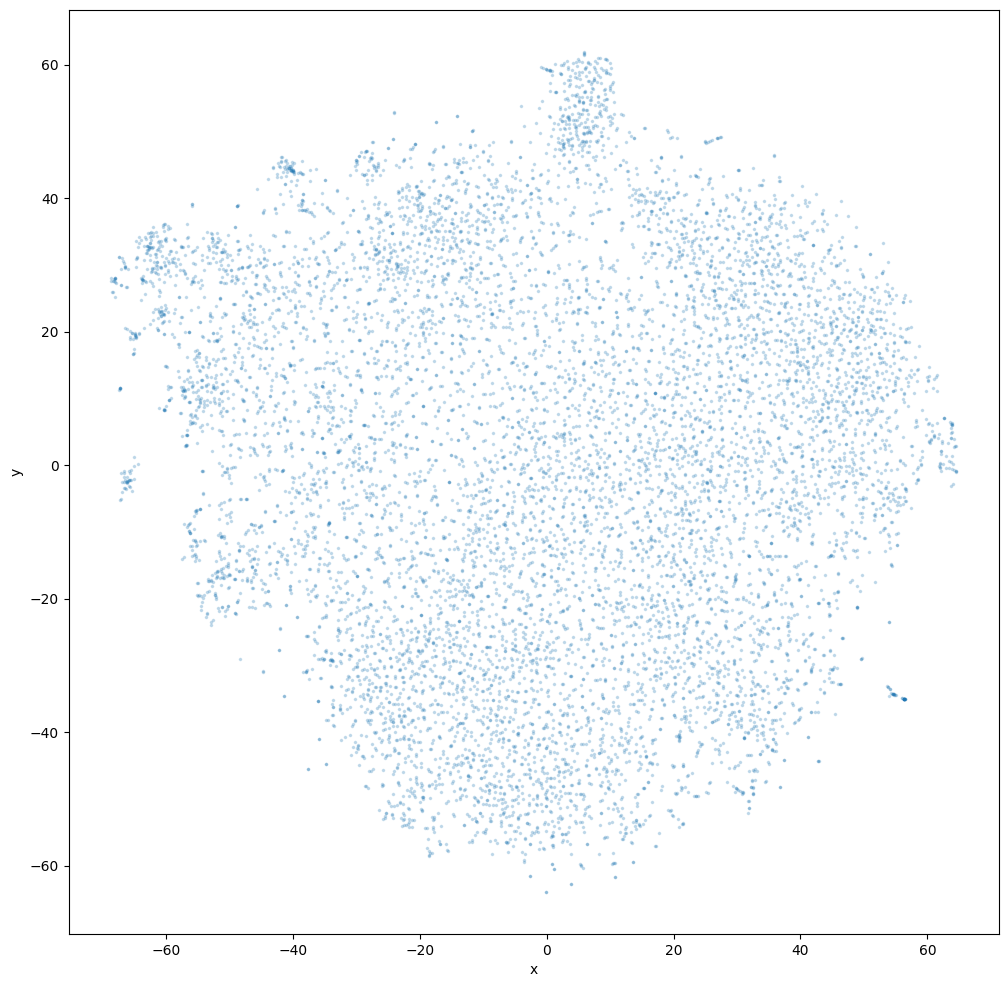

In [52]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12),
                           marker='.', s=10, alpha=0.2)

In [53]:
output_notebook()

In [55]:
subset_df = coords_df.sample(n=5000)

In [58]:
from bokeh.plotting import figure

p = figure(width=800, height=800)  # Changed 'plot_width' and 'plot_height' to 'width' and 'height'
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [59]:
show(p)

In [ ]:
# output_file() here